In [2]:
library(ggplot2)
library(tidyverse)
library(saqgetr)
library(lubridate)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
suppressMessages(library(repr))
options(repr.plot.width=25,
        repr.plot.height=10,
        #repr.plot.pointsize=50,
        repr.plot.family='serif'
       )

In [193]:
spain.sites <- get_saq_sites() %>%
    filter(country == "spain",
           site == "es2010a",
          )

head(spain.sites)

site,site_name,latitude,longitude,elevation,country,country_iso_code,site_type,site_area,date_start,date_end,network,eu_code,eoi_code,observation_count,data_source
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>
es2010a,LA RUBIA II,41.63,-4.740556,683,spain,ES,traffic,urban,2011-04-01,2021-01-16 01:00:00,NET_ES208A,STA_ES2010A,ES2010A,494065,airbase; aqer:e1a; aqer:e2a


In [152]:
data.haro <- get_saq_observations(site = "es1740a",
                                  start="2010-01-01",
                                  #valid_only = TRUE,
                                  verbose = TRUE
                                 )

2021-01-28 17:44:19.948 CET: Loading `air_quality_data_site_es1740a_2010.csv.gz`...

2021-01-28 17:44:20.679 CET: Loading `air_quality_data_site_es1740a_2011.csv.gz`...

2021-01-28 17:44:21.334 CET: Loading `air_quality_data_site_es1740a_2012.csv.gz`...

2021-01-28 17:44:22.100 CET: Loading `air_quality_data_site_es1740a_2013.csv.gz`...

2021-01-28 17:44:23.078 CET: Loading `air_quality_data_site_es1740a_2014.csv.gz`...

2021-01-28 17:44:23.958 CET: Loading `air_quality_data_site_es1740a_2015.csv.gz`...

2021-01-28 17:44:24.828 CET: Loading `air_quality_data_site_es1740a_2016.csv.gz`...

2021-01-28 17:44:25.667 CET: Loading `air_quality_data_site_es1740a_2017.csv.gz`...

2021-01-28 17:44:26.571 CET: Loading `air_quality_data_site_es1740a_2018.csv.gz`...

2021-01-28 17:44:27.390 CET: Loading `air_quality_data_site_es1740a_2019.csv.gz`...

2021-01-28 17:44:28.218 CET: Loading `air_quality_data_site_es1740a_2020.csv.gz`...

2021-01-28 17:44:29.109 CET: Loading `air_quality_data_site_es174

In [153]:
a <- data.haro[data.haro$variable %in% c("no2", "no", "o3", "pm10", "pm2.5"), ]

In [154]:
head(a)

date,date_end,site,variable,process,summary,validity,unit,value
<dttm>,<dttm>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>
2010-01-01,NA,es1740a,pm10,41448,20,1,ug.m-3,12.743
2010-01-02,NA,es1740a,pm10,41448,20,1,ug.m-3,18.278
2010-01-03,NA,es1740a,pm10,41448,20,1,ug.m-3,15.230
2010-01-04,NA,es1740a,pm10,41448,20,1,ug.m-3,26.511
2010-01-05,NA,es1740a,pm10,41448,20,1,ug.m-3,19.483
2010-01-06,NA,es1740a,pm10,41448,20,1,ug.m-3,16.447


In [175]:
df <- data.haro[data.haro$variable == "pm10", ]
print(sum(is.na(df$date_end)))
print(length(df$date_end))
head(df)

[1] 26498
[1] 91014


date,date_end,site,variable,process,summary,validity,unit,value
<dttm>,<dttm>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>
2010-01-01,NA,es1740a,pm10,41448,20,1,ug.m-3,12.743
2010-01-02,NA,es1740a,pm10,41448,20,1,ug.m-3,18.278
2010-01-03,NA,es1740a,pm10,41448,20,1,ug.m-3,15.230
2010-01-04,NA,es1740a,pm10,41448,20,1,ug.m-3,26.511
2010-01-05,NA,es1740a,pm10,41448,20,1,ug.m-3,19.483
2010-01-06,NA,es1740a,pm10,41448,20,1,ug.m-3,16.447


In [157]:
min(df$date)

[1] "2010-01-01 UTC"

In [158]:
max(df$date)

[1] "2020-09-14 09:00:00 UTC"

In [159]:
df <- df[-which(is.na(df$date_end)), ]

head(df)

date,date_end,site,variable,process,summary,validity,unit,value
<dttm>,<dttm>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>
2014-01-01 00:00:00,2014-01-01 01:00:00,es1740a,pm10,119025,1,1,ug.m-3,45
2014-01-01 01:00:00,2014-01-01 02:00:00,es1740a,pm10,119025,1,1,ug.m-3,42
2014-01-01 02:00:00,2014-01-01 03:00:00,es1740a,pm10,119025,1,1,ug.m-3,45
2014-01-01 03:00:00,2014-01-01 04:00:00,es1740a,pm10,119025,1,1,ug.m-3,43
2014-01-01 04:00:00,2014-01-01 05:00:00,es1740a,pm10,119025,1,1,ug.m-3,40
2014-01-01 05:00:00,2014-01-01 06:00:00,es1740a,pm10,119025,1,1,ug.m-3,37


In [160]:
df[which((df$date - df$date_end) != -1),]

date,date_end,site,variable,process,summary,validity,unit,value
<dttm>,<dttm>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>


In [161]:
resolut <- df$date - df$date_end
sum(resolut)/length(resolut)

Time difference of -1 hours

In [162]:
min(df$date)

[1] "2014-01-01 UTC"

In [163]:
max(df$date)

[1] "2020-09-14 09:00:00 UTC"

In [185]:
miss <- df[year(df$date) == "2013",]# & year(df$date) <= "2014",]
head(miss)

date,date_end,site,variable,process,summary,validity,unit,value
<dttm>,<dttm>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>


Warning message:
“Removed 10 row(s) containing missing values (geom_path).”


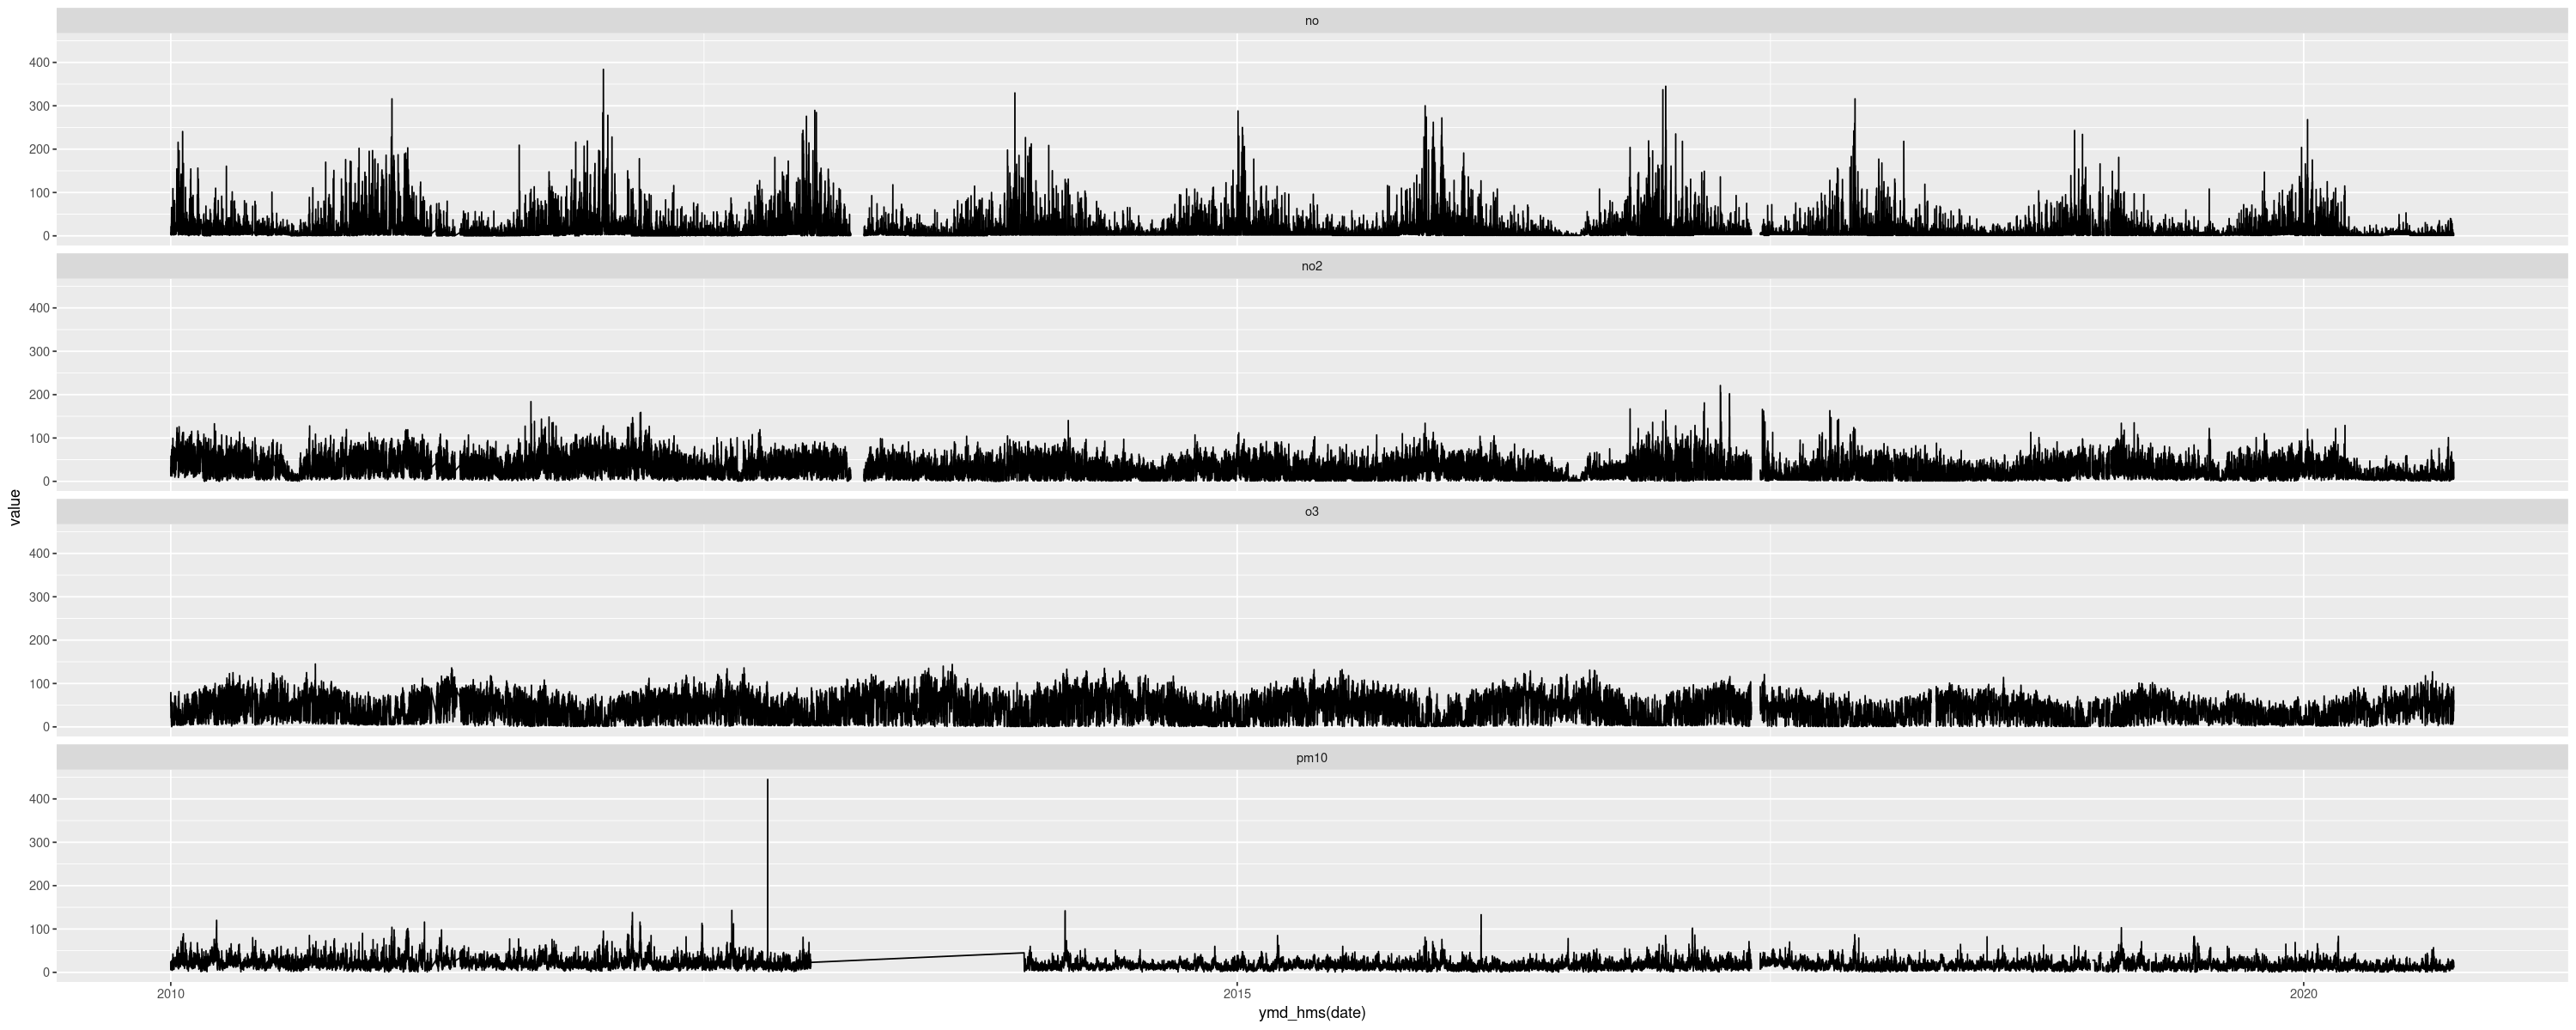

In [155]:
ggplot() +
    geom_line(data=a, aes(x=ymd_hms(date), y=value)) +
               facet_wrap(~variable, ncol=1)